In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
f = open("PWM vs ENC new.txt", "r")
data = []
for x in f:
    data.append(x)

In [3]:
data_L = []
data_R = []
for i in data[:-1]:
    data_L.append(float(i[:-1].split(" ")[1]))
    data_R.append(float(i[:-1].split(" ")[2]))

l = 101
data_L1 = data_L[:l]
data_L2 = data_L[l+1:2*l]
data_L3 = data_L[2*l:3*l]
data_L4 = data_L[3*l:4*l]
data_L5 = data_L[4*l:]
data_R1 = data_R[:l]
data_R2 = data_R[l:2*l]
data_R3 = data_R[2*l:3*l]
data_R4 = data_R[3*l:4*l]
data_R5 = data_R[4*l:]

#print(data_L1)
#print(data_L2)
#print(data_L3)
#print(data_L4)
#print(data_L5)

In [4]:
data_L_avg = []
data_R_avg = []
for i in range(l-1):
    data_L_avg.append((data_L1[i]+data_L2[i]+data_L3[i]+data_L4[i]+data_L5[i])/5)
    data_R_avg.append((data_R1[i]+data_R2[i]+data_R3[i]+data_R4[i]+data_R5[i])/5)

In [5]:
for i in range(l-1):
    if data_L_avg[i] > 0:
        L_begin = i
        break
for i in range(l-1):
    if data_R_avg[i] > 0:
        R_begin = i
        break
        
print(L_begin)
print(R_begin)

18
17


In [6]:
L = []
R = []
for i in range(L_begin,l-1):
    L.append(i)
for i in range(R_begin,l-1):
    R.append(i)
    
#print(L)

In [7]:
data_L_avg_filtered = data_L_avg[L_begin:]
data_R_avg_filtered = data_R_avg[R_begin:]

L_2D = np.array(L).reshape(-1,1)
R_2D = np.array(R).reshape(-1,1)
data_L_avg_filtered_2D = np.array(data_L_avg_filtered).reshape(-1,1)
data_R_avg_filtered_2D = np.array(data_R_avg_filtered).reshape(-1,1)

#print(data_L_avg_filtered)

# Linear Reggression for PWM vs Omega

In [8]:
regression = linear_model.LinearRegression(fit_intercept = True)
regression.fit(L_2D, data_L_avg_filtered_2D)
Coefficients_L = regression.coef_
Ïnercept_L = regression.intercept_
print("Coefficients_L: \n", Coefficients_L)
print("Ïnercept_L: \n", Ïnercept_L)

regression.fit(R_2D, data_R_avg_filtered_2D)
Coefficients_R = regression.coef_
Ïnercept_R = regression.intercept_
print("Coefficients_R: \n", Coefficients_R)
print("Ïnercept_R: \n", Ïnercept_R)

Coefficients_L: 
 [[0.03262054]]
Ïnercept_L: 
 [-0.81542365]
Coefficients_R: 
 [[0.03111859]]
Ïnercept_R: 
 [-0.78451694]


In [9]:
pred_L = []
pred_R = []
for i in range (L_begin,l-1):
    pred_L.append(Coefficients_L*i + Ïnercept_L)
for i in range (R_begin,l-1):
    pred_R.append(Coefficients_R*i + Ïnercept_R)

pred_L = np.array(pred_L).reshape(-1,1)
pred_R = np.array(pred_R).reshape(-1,1)

In [21]:
mse_L = mean_squared_error(data_L_avg_filtered, pred_L)
mse_R = mean_squared_error(data_R_avg_filtered, pred_R)

print("mse_L = ",mse_L)
print("mse_R = ",mse_R)

mse_L =  0.008737541161008637
mse_R =  0.01578782056735401


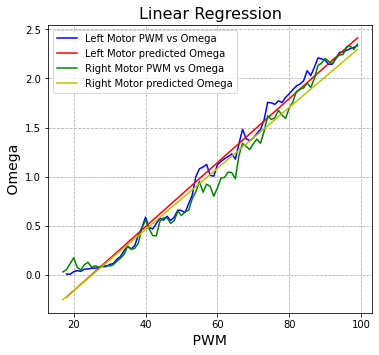

In [11]:
fig = plt.figure()
ax=fig.add_axes([0,0,0.75,1])
plt.plot(L,data_L_avg_filtered,'-b',label="Left Motor PWM vs Omega")
plt.plot(L,pred_L,'-r',label="Left Motor predicted Omega")
plt.plot(R,data_R_avg_filtered,'-g',label="Right Motor PWM vs Omega")
plt.plot(R,pred_R,'-y',label="Right Motor predicted Omega")
#plt.xlim((-3.5,3.5))
#plt.ylim((0,1.2))
plt.title("Linear Regression",fontsize=16)
plt.xlabel(" PWM ",fontsize=14)
plt.ylabel(" Omega ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

# 2nd Order Polynomial Estimation for PWM vs Omega

In [22]:
Coefficients_L_2 = np.polyfit(L,data_L_avg_filtered,2)
Coefficients_R_2 = np.polyfit(R,data_R_avg_filtered,2)

print("Coefficients_L_2: \n" , Coefficients_L_2)
print("Coefficients_R_2: \n" , Coefficients_R_2)

Coefficients_L_2: 
 [ 7.64041454e-05  2.36812568e-02 -5.96754982e-01]
Coefficients_R_2: 
 [ 1.92967539e-04  8.73435835e-03 -2.46137506e-01]


In [23]:
pred_L_2 = []
pred_R_2 = []
for i in range (L_begin,l-1):
    pred_L_2.append(Coefficients_L_2[0]*i**2 + Coefficients_L_2[1]*i+ Coefficients_L_2[2])
for i in range (R_begin,l-1):
    pred_R_2.append(Coefficients_R_2[0]*i**2 + Coefficients_R_2[1]*i+ Coefficients_R_2[2])
    
pred_L_2 = np.array(pred_L_2).reshape(-1,1)
pred_R_2 = np.array(pred_R_2).reshape(-1,1)

In [24]:
mse_L = mean_squared_error(data_L_avg_filtered, pred_L_2)
mse_R = mean_squared_error(data_R_avg_filtered, pred_R_2)

print("mse_L = ",mse_L)
print("mse_R = ",mse_R)

mse_L =  0.0072723519088203304
mse_R =  0.005977276504452704


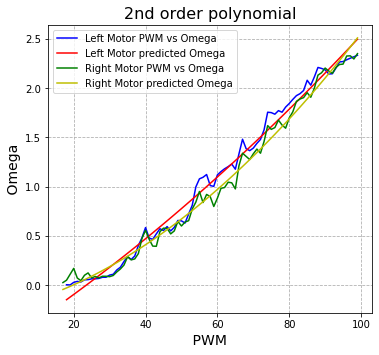

In [25]:
fig = plt.figure()
ax=fig.add_axes([0,0,0.75,1])
plt.plot(L,data_L_avg_filtered,'-b',label="Left Motor PWM vs Omega")
plt.plot(L,pred_L_2,'-r',label="Left Motor predicted Omega")
plt.plot(R,data_R_avg_filtered,'-g',label="Right Motor PWM vs Omega")
plt.plot(R,pred_R_2,'-y',label="Right Motor predicted Omega")
#plt.xlim((-3.5,3.5))
#plt.ylim((0,1.2))
plt.title("2nd order polynomial",fontsize=16)
plt.xlabel(" PWM ",fontsize=14)
plt.ylabel(" Omega ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

# 3rd Order Polynomial Estimation for PWM vs Omega

In [29]:
Coefficients_L_3 = np.polyfit(L,data_L_avg_filtered,3)
Coefficients_R_3 = np.polyfit(R,data_R_avg_filtered,3)

print("Coefficients_L_3: \n" , Coefficients_L_3)
print("Coefficients_R_3: \n" , Coefficients_R_3)

Coefficients_L_3: 
 [-5.66142647e-06  1.06998449e-03 -2.87350602e-02  2.02746003e-01]
Coefficients_R_3: 
 [-3.93213415e-06  8.77158880e-04 -2.68868449e-02  2.85479167e-01]


In [33]:
pred_L_3 = []
pred_R_3 = []
for i in range (L_begin,l-1):
    pred_L_3.append(Coefficients_L_3[0]*i**3 + Coefficients_L_3[1]*i**2 + Coefficients_L_3[2]*i + Coefficients_L_3[3])
for i in range (R_begin,l-1):
    pred_R_3.append(Coefficients_R_3[0]*i**3 + Coefficients_R_3[1]*i**2 + Coefficients_R_3[2]*i + Coefficients_R_3[3])
    
pred_L_3 = np.array(pred_L_3).reshape(-1,1)
pred_R_3 = np.array(pred_R_3).reshape(-1,1)

In [34]:
mse_L = mean_squared_error(data_L_avg_filtered, pred_L_3)
mse_R = mean_squared_error(data_R_avg_filtered, pred_R_3)

print("mse_L = ",mse_L)
print("mse_R = ",mse_R)

mse_L =  0.00379961316650203
mse_R =  0.004175569605631225


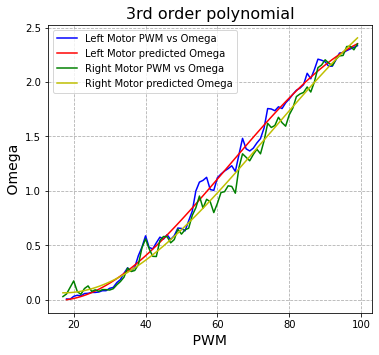

In [36]:
fig = plt.figure()
ax=fig.add_axes([0,0,0.75,1])
plt.plot(L,data_L_avg_filtered,'-b',label="Left Motor PWM vs Omega")
plt.plot(L,pred_L_3,'-r',label="Left Motor predicted Omega")
plt.plot(R,data_R_avg_filtered,'-g',label="Right Motor PWM vs Omega")
plt.plot(R,pred_R_3,'-y',label="Right Motor predicted Omega")
#plt.xlim((-3.5,3.5))
#plt.ylim((0,1.2))
plt.title("3rd order polynomial",fontsize=16)
plt.xlabel(" PWM ",fontsize=14)
plt.ylabel(" Omega ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

# 4th Order Polynomial Estimation for PWM vs Omega

In [37]:
Coefficients_L_4 = np.polyfit(L,data_L_avg_filtered,4)
Coefficients_R_4 = np.polyfit(R,data_R_avg_filtered,4)

print("Coefficients_L_4: \n" , Coefficients_L_4)
print("Coefficients_R_4: \n" , Coefficients_R_4)

Coefficients_L_4: 
 [-1.58372550e-08 -1.95550879e-06  7.67594731e-04 -1.87206118e-02
  9.14758654e-02]
Coefficients_R_4: 
 [-3.56787299e-08  4.34533119e-06  2.09655716e-04 -5.14726468e-03
  4.97317141e-02]


In [38]:
pred_L_4 = []
pred_R_4 = []
for i in range (L_begin,l-1):
    pred_L_4.append(Coefficients_L_4[0]*i**4 + Coefficients_L_4[1]*i**3 + Coefficients_L_4[2]*i**2 + Coefficients_L_4[3]*i + Coefficients_L_4[4])
for i in range (R_begin,l-1):
    pred_R_4.append(Coefficients_R_4[0]*i**4 + Coefficients_R_4[1]*i**3 + Coefficients_R_4[2]*i**2 + Coefficients_R_4[3]*i + Coefficients_R_4[4])
    
pred_L_4 = np.array(pred_L_4).reshape(-1,1)
pred_R_4 = np.array(pred_R_4).reshape(-1,1)

In [39]:
mse_L = mean_squared_error(data_L_avg_filtered, pred_L_4)
mse_R = mean_squared_error(data_R_avg_filtered, pred_R_4)

print("mse_L = ",mse_L)
print("mse_R = ",mse_R)

mse_L =  0.003788038921092303
mse_R =  0.004110838645648905


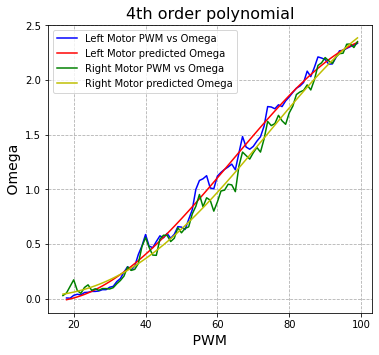

In [40]:
fig = plt.figure()
ax=fig.add_axes([0,0,0.75,1])
plt.plot(L,data_L_avg_filtered,'-b',label="Left Motor PWM vs Omega")
plt.plot(L,pred_L_4,'-r',label="Left Motor predicted Omega")
plt.plot(R,data_R_avg_filtered,'-g',label="Right Motor PWM vs Omega")
plt.plot(R,pred_R_4,'-y',label="Right Motor predicted Omega")
#plt.xlim((-3.5,3.5))
#plt.ylim((0,1.2))
plt.title("4th order polynomial",fontsize=16)
plt.xlabel(" PWM ",fontsize=14)
plt.ylabel(" Omega ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

# Omega vs PWM with Polynomial Estimation

In [26]:
Coefficients_L_PWM = np.polyfit(data_L_avg_filtered,L,2)
Coefficients_R_PWM = np.polyfit(data_R_avg_filtered,R,2)

print("Coefficients_L_PWM: \n" , Coefficients_L_PWM)
print("Coefficients_R_PWM: \n" , Coefficients_R_PWM)

Coefficients_L_PWM: 
 [-1.9765702  34.70570173 24.1273073 ]
Coefficients_R_PWM: 
 [-5.55509933 43.87695327 22.18873416]


In [27]:
pred_L_PWM = []
pred_R_PWM = []
w = []
for i in range (360):
    w.append(i/100)
    pred_L_PWM.append(Coefficients_L_PWM[0]*(i/100)**2 + Coefficients_L_PWM[1]*(i/100)+ Coefficients_L_PWM[2])
for i in range (360):
    pred_R_PWM.append(Coefficients_R_PWM[0]*(i/100)**2 + Coefficients_R_PWM[1]*(i/100)+ Coefficients_R_PWM[2])
    
w = np.array(w).reshape(-1,1)
pred_L_PWM = np.array(pred_L_PWM).reshape(-1,1)
pred_R_PWM = np.array(pred_R_PWM).reshape(-1,1)

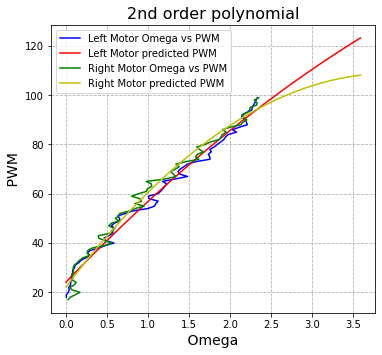

In [17]:
fig = plt.figure()
ax=fig.add_axes([0,0,0.75,1])
plt.plot(data_L_avg_filtered, L, '-b',label="Left Motor Omega vs PWM")
plt.plot(w,pred_L_PWM,'-r',label="Left Motor predicted PWM")
plt.plot(data_R_avg_filtered, R, '-g',label="Right Motor Omega vs PWM")
plt.plot(w,pred_R_PWM,'-y',label="Right Motor predicted PWM")
#plt.xlim((-3.5,3.5))
#plt.ylim((0,1.2))
plt.title("2nd order polynomial",fontsize=16)
plt.xlabel(" Omega ",fontsize=14)
plt.ylabel(" PWM ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

# Omega vs PWM with 3rd Order Polynomial Estimation

In [41]:
Coefficients_L_PWM_3 = np.polyfit(data_L_avg_filtered,L,3)
Coefficients_R_PWM_3 = np.polyfit(data_R_avg_filtered,R,3)

print("Coefficients_L_PWM_3: \n" , Coefficients_L_PWM_3)
print("Coefficients_R_PWM_3: \n" , Coefficients_R_PWM_3)

Coefficients_L_PWM_3: 
 [  6.19148423 -23.2480406   53.06482181  21.64814877]
Coefficients_R_PWM_3: 
 [  5.37972901 -24.09167079  60.0534003   19.73376455]


In [43]:
pred_L_PWM_3 = []
pred_R_PWM_3 = []
w = []
for i in range (360):
    w.append(i/100)
    pred_L_PWM_3.append(Coefficients_L_PWM_3[0]*(i/100)**3 + Coefficients_L_PWM_3[1]*(i/100)**2 + Coefficients_L_PWM_3[2]*(i/100) + Coefficients_L_PWM_3[3])
for i in range (360):
    pred_R_PWM_3.append(Coefficients_R_PWM_3[0]*(i/100)**3 + Coefficients_R_PWM_3[1]*(i/100)**2 + Coefficients_R_PWM_3[2]*(i/100) + Coefficients_R_PWM_3[3])
    
w = np.array(w).reshape(-1,1)
pred_L_PWM_3 = np.array(pred_L_PWM_3).reshape(-1,1)
pred_R_PWM_3 = np.array(pred_R_PWM_3).reshape(-1,1)

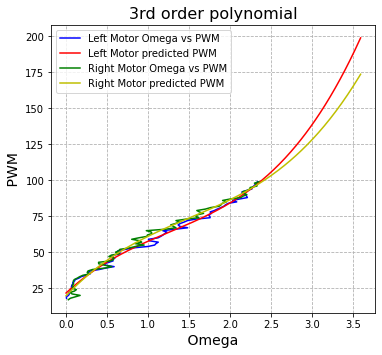

In [44]:
fig = plt.figure()
ax=fig.add_axes([0,0,0.75,1])
plt.plot(data_L_avg_filtered, L, '-b',label="Left Motor Omega vs PWM")
plt.plot(w,pred_L_PWM_3,'-r',label="Left Motor predicted PWM")
plt.plot(data_R_avg_filtered, R, '-g',label="Right Motor Omega vs PWM")
plt.plot(w,pred_R_PWM_3,'-y',label="Right Motor predicted PWM")
#plt.xlim((-3.5,3.5))
#plt.ylim((0,1.2))
plt.title("3rd order polynomial",fontsize=16)
plt.xlabel(" Omega ",fontsize=14)
plt.ylabel(" PWM ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()